#  Example 1 - Visualize phenotype prediction data

This code demonstrates how to analyze and visualize phenotype prediction data using Python. It focuses on organisms’ ability to grow in various carbon sources, combining two independant datasets and visualizing the results as a heatmap. This example is useful for beginners and intermediate learners in data science, particularly in data preprocessing, analysis, and visualization.

## Load Libraries
In this section, we load the necessary Python libraries used for data manipulation and visualization:
- **pandas**: For loading and manipulating tabular data.
- **seaborn**: For creating the heatmap.
- **matplotlib**: For enhancing visualizations.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data
We load two tab-delimited phenotype prediction datasets:
- ENIGMA dataset  (couresty of ENIGMA group, and Hira Lesea)
- PMI dataset     (courtesy of PMI group, and Ranjan Priya)

Each dataset contains information about organisms and their ability to grow in various carbon sources.
The first column is set as the index for easy reference.

In [2]:
# Load the data
enigma_data = pd.read_csv('ENIGMA_phenoPredictions_CompleteM.tsv', sep='\t', index_col=0)
pmi_data = pd.read_csv('PMI_phenoPredictions_CompleteM.tsv', sep='\t', index_col=0)

## Simplified Input Matrix Example

Below is a simplified matrix showing a few genome labels and 5 columns (carbon sources):

| Genome                      | Adenine | L-arabinose | D-cellobiose | D-Galactose | D-Glucosamine |
|-----------------------------|---------|-------------|--------------|-------------|---------------|
| CPT56D-587-MTF.genome       | 0       | 0           | 0            | 0           | 1             |
| DP16D-L5.genome             | 0       | 0           | 0            | 0           | 1             |
| DP16D-R1.genome             | 0       | 1           | 1            | 0           | 1             |
| DP16D-T1.genome             | 1       | 0           | 0            | 0           | 1             |
| EB106-08-02-XG196.genome    | 0       | 0           | 0            | 1           | 1             |

- **Rows** represent genomes (organisms).
- **Columns** represent selected media (carbon sources).
- A value of `1` indicates growth, while `0` indicates no growth.

## Combine the Datasets
After loading the data, we concatenate the two datasets into one.
This ensures we have a unified dataset for analysis.

In [3]:
# Combine the datasets
combined_data = pd.concat([enigma_data, pmi_data])

## Calculate Growth Phenotype Count
For each organism (row), we calculate the total number of carbon sources it can grow on.
This is done by summing all binary values (1 = growth, 0 = no growth) across the columns (carbon sources).
The result is stored in a new column called `Growth_Phenotype_Count`.

In [4]:
# Calculate the phenotype probability (number of '1's) for each organism
combined_data['Growth_Phenotype_Count'] = combined_data.sum(axis=1)

## Sort Organisms by Growth Ability
To analyze the organisms that can grow in the most carbon sources, we sort the data
in descending order by the `Growth_Phenotype_Count` column.

In [5]:
# Sort by the phenotype count in descending order
sorted_data = combined_data.sort_values(by='Growth_Phenotype_Count', ascending=False)

## Prepare Data for Heatmap Visualization
Since the `Growth_Phenotype_Count` column is not needed for the heatmap visualization,
we drop it from the dataset to focus only on binary growth predictions across media.

In [6]:
# Drop the phenotype count column for the heatmap
heatmap_data = sorted_data.drop(columns=['Growth_Phenotype_Count'])

## Create and Plot the Heatmap
A heatmap is a graphical representation of data where individual values are represented
by different shades of color. Here, we use the `viridis` colormap, where shades indicate
growth (1 = grow) or no growth (0).

Labels are added to improve interpretability:
- Rows represent organisms.
- Columns represent carbon sources.
- The color indicates the growth prediction (1 = grow, 0 = no growth).

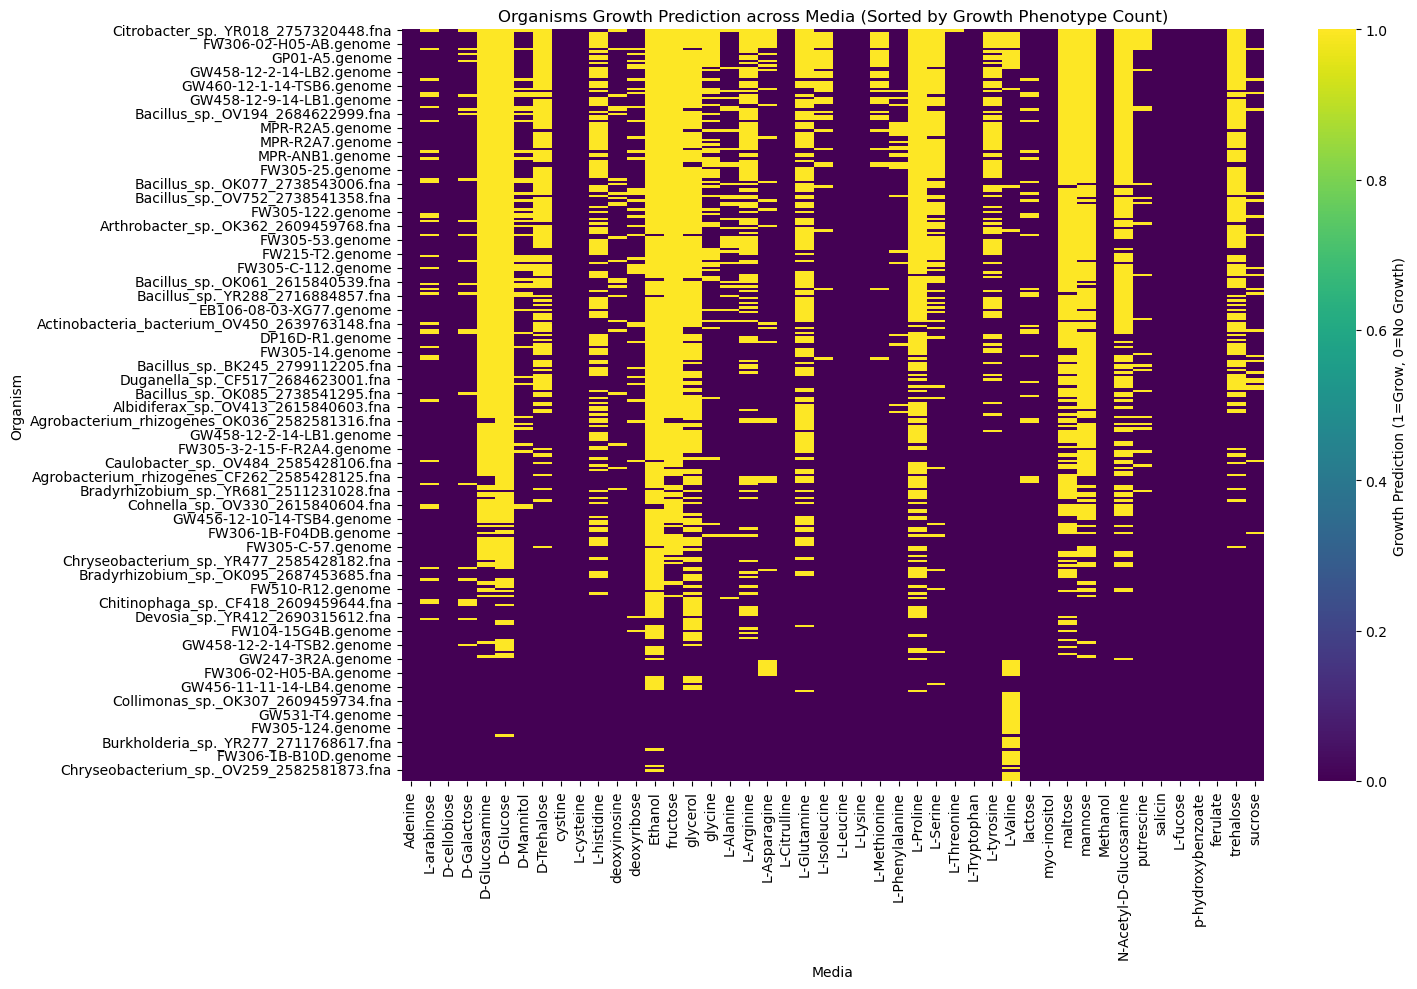

In [7]:
# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Growth Prediction (1=Grow, 0=No Growth)'})
plt.title('Organisms Growth Prediction across Media (Sorted by Growth Phenotype Count)')
plt.xlabel('Media')
plt.ylabel('Organism')
plt.tight_layout()
plt.show()

### Heatmap Visualization of Growth Predictions

### Explanation of Code Steps

1. **`plt.figure(figsize=(15, 10))`**:
   - Sets the figure size to 15x10 inches to ensure the heatmap is clear and easy to read.

2. **`sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Growth Prediction (1=Grow, 0=No Growth)'})`**:
   - **`heatmap_data`**: The input data for the heatmap, typically a DataFrame with organisms as rows and media (carbon sources) as columns.
   - **`cmap='viridis'`**: Specifies the color map, where different shades represent binary growth predictions (`1=Grow`, `0=No Growth`). Try different colors `plasma`, `inferno`, `magma`, `cividis` and re-run the code
   - **`cbar_kws={'label': ...}`**: Adds a label to the color bar to indicate what the colors represent.

3. **`plt.title('Organisms Growth Prediction across Media (Sorted by Growth Phenotype Count)')`**:
   - Adds a descriptive title for the heatmap to clarify what the visualization represents.

4. **`plt.xlabel('Media')`** and **`plt.ylabel('Organism')`**:
   - Labels the x-axis as "Media" (carbon sources) and the y-axis as "Organism" (rows in the data).

5. **`plt.tight_layout()`**:
   - Adjusts the layout to ensure that elements like axis labels, titles, and the plot area do not overlap.

6. **`plt.show()`**:
   - Displays the heatmap in the output cell of the notebook or the plotting window.

## Learning Context

This code introduces key concepts for data science learners:

- **Data Manipulation**: Using `pandas` to merge datasets, compute new metrics (growth phenotype count), and sort data.
- **Visualization**: Employing `seaborn` to create an interpretable heatmap.
- **Interpretation**: Identifying patterns in the heatmap (e.g., organisms with the highest growth potential across the most carbon sources).

---

## Practical Applications

This workflow can be applied in various domains:

- **Biology**: Visualizing phenotype predictions, genetic analyses, or growth experiments.
- **Health Sciences**: Analyzing binary datasets for treatment outcomes or experimental conditions.
- **Business Intelligence**: Exploring binary features like customer behavior or market penetration across regions.

The code encourages exploratory data analysis (EDA) and provides a foundation for further advanced techniques such as clustering or machine learning.